In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import time
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
data = pd.read_csv('datasets/total_data.csv', encoding='gbk')

In [16]:
min(data['营收/资产_max'])

0.09999616579118902

In [21]:
X = data.drop(['ID', 'flag'], axis=1)

In [22]:
X.columns

Index(['注册时间', '注册资本', '控制人持股比例', '交通运输业', '商业服务业', '工业', '服务业', '社区服务', '零售业',
       '山东',
       ...
       '主营业务收入_growth', '利润总额_growth', '净利润_growth', '纳税总额_growth',
       '所有者权益合计_growth', '负债/资产_growth', '负债/所有者_growth', '所有者/资产_growth',
       '净利/所有者_growth', '政策/净利_growth'],
      dtype='object', length=250)

In [23]:
y = data['flag']

In [24]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

In [25]:
from sklearn.feature_selection import RFECV

In [26]:
clf_rf = RandomForestClassifier()
rfecv = RFECV(estimator=clf_rf, step=1, cv=kf, scoring='f1')
rfecv.fit(X, y)
j = 0
for i in rfecv.support_:
    if(i):
        print(i, X.columns[j])
    j += 1

True 净三小0
True 净利润_mean
True 纳税总额_mean
True 纳税/净利_mean
True 净利/资产_mean
True 净利/营收_mean
True 纳税/营收_mean
True 净利/利润_mean
True 净利/负债_mean
True 纳税/负债_mean
True 纳税/融资额度_mean
True 纳税/净利_min
True 所得税_min
True 所得税/纳税_min
True 净利润_max
True 纳税总额_max
True 纳税/净利_max
True 净利/资产_max
True 净利/营收_max
True 纳税/营收_max
True 净利/利润_max
True 净利/负债_max
True 纳税/负债_max
True 净利/融资额度_max
True 纳税/融资额度_max
True 融资/负债_max
True 纳税总额_std
True 纳税/净利_std
True 净利/营收_std
True 纳税/营收_std
True 所得税/纳税_std
True 纳税/负债_std
True 纳税/融资额度_std


In [27]:
from sklearn import tree

In [28]:
clf_dt = tree.DecisionTreeClassifier()
rfecv = RFECV(estimator=clf_dt, step=1, cv=kf, scoring='f1')
rfecv.fit(X, y)
j = 0
for i in rfecv.support_:
    if i:
        print(i, X.columns[j])
    j += 1

True 净利/所有者_mean
True 政策/净利_mean
True 融资/负债_mean
True 政策/负债_mean
True 接受补助_mean
True 从业人数_min
True 资产总额_min
True 负债总额_min
True 营业总收入_min
True 主营业务收入_min
True 利润总额_min
True 净利润_min
True 纳税总额_min
True 所有者权益合计_min
True 纳税/净利_min
True 负债/资产_min
True 主收/营收_min
True 净利/资产_min
True 净利/营收_min
True 纳税/营收_min
True 利润/营收_min
True 净利/利润_min
True 所得税_min
True 所得税/纳税_min
True 净利/负债_min
True 纳税/负债_min
True 负债/所有者_min
True 费用_min
True 费用/营收_min
True 利润/费用_min
True 净利/融资额度_min
True 纳税/融资额度_min
True 营收/资产_min
True 所有者/资产_min
True 净利/所有者_min
True 政策/净利_min
True 融资/负债_min
True 政策/负债_min
True 接受补助_min
True 资产总额_max
True 负债总额_max
True 营业总收入_max
True 主营业务收入_max
True 利润总额_max
True 净利润_max
True 纳税总额_max
True 所有者权益合计_max
True 纳税/净利_max
True 负债/资产_max
True 主收/营收_max
True 净利/资产_max
True 净利/营收_max
True 纳税/营收_max
True 利润/营收_max
True 净利/利润_max
True 所得税_max
True 所得税/纳税_max
True 净利/负债_max
True 纳税/负债_max
True 负债/所有者_max
True 费用_max
True 费用/营收_max
True 利润/费用_max
True 净利/融资额度_max
True 纳税/融资额度_max
True 营收/资产_max
True 所有者/

In [11]:
X = data[['净三小0', '净利润_mean', '纳税总额_mean', '纳税/净利_mean', '净利/资产_mean', '净利/营收_mean',
          '纳税/营收_mean', '净利/利润_mean', '净利/负债_mean', '纳税/负债_mean', '纳税/融资额度_mean', 
          '纳税/净利_min', '所得税_min', '所得税/纳税_min', '净利润_max', '纳税总额_max', '纳税/净利_max', 
          '净利/资产_max', '净利/营收_max', '纳税/营收_max', '净利/利润_max', '净利/负债_max', '纳税/负债_max', 
          '净利/融资额度_max', '纳税/融资额度_max', '融资/负债_max', '纳税总额_std', '纳税/净利_std', 
          '净利/营收_std', '纳税/营收_std', '所得税/纳税_std', '纳税/负债_std', '纳税/融资额度_std', 
          '净利/所有者_mean',  '政策/净利_mean', '融资/负债_mean' ,'政策/负债_mean', '接受补助_mean', 
          '从业人数_min', '资产总额_min', '负债总额_min', '营业总收入_min', '主营业务收入_min', '利润总额_min',
          '净利润_min', '纳税总额_min', '所有者权益合计_min', '负债/资产_min', '主收/营收_min', '净利/资产_min',
          '净利/营收_min', '纳税/营收_min', '利润/营收_min', '净利/利润_min', '净利/负债_min', '纳税/负债_min', 
          '负债/所有者_min', '费用_min', '费用/营收_min', '利润/费用_min', '净利/融资额度_min', 
          '纳税/融资额度_min', '营收/资产_min', '所有者/资产_min', '净利/所有者_min', '政策/净利_min', 
          '融资/负债_min', '政策/负债_min', '接受补助_min', '资产总额_max', '负债总额_max', '营业总收入_max',
          '主营业务收入_max','利润总额_max', '所有者权益合计_max', '负债/资产_max', '主收/营收_max', 
          '利润/营收_max', '所得税_max', '所得税/纳税_max', '负债/所有者_max', '费用_max', '费用/营收_max', 
          '利润/费用_max', '营收/资产_max', '所有者/资产_max', '净利/所有者_max', '政策/净利_max', 
          '政策/负债_max', '接受补助_max', '从业人数_std', '资产总额_std', '负债总额_std', '营业总收入_std', 
          '主营业务收入_std', '利润总额_std', '净利润_std', '所有者权益合计_std', '负债/资产_std', '主收/营收_std', 
          '净利/资产_std', '利润/营收_std', '净利/利润_std', '所得税_std', '净利/负债_std', '负债/所有者_std', '费用_std',
          '费用/营收_std', '利润/费用_std', '净利/融资额度_std', '营收/资产_std', '所有者/资产_std',
          '净利/所有者_std', '政策/净利_std', '融资/负债_std', '政策/负债_std', '接受补助_std', '从业人数_growth',
          '资产总额_growth', '负债总额_growth', '营业总收入_growth', '主营业务收入_growth', '利润总额_growth',
          '净利润_growth', '纳税总额_growth', '所有者权益合计_growth', '负债/资产_growth', '负债/所有者_growth',
          '所有者/资产_growth', '净利/所有者_growth', '政策/净利_growth'
         ]]

In [12]:
y = data['flag']

In [13]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=2020)

In [34]:
for i in range(5):
    params = {'n_estimators': [10, 50, 100], 'class_weight': (None, 'balanced', 'balanced_subsample')}
    clf_rf = RandomForestClassifier()
    clf_rf_gcv = GridSearchCV(estimator=clf_rf, param_grid=params, cv=kf, scoring='f1')
    clf_rf_gcv.fit(X, y)
    print(clf_rf_gcv.best_params_)

{'class_weight': None, 'n_estimators': 100}
{'class_weight': 'balanced', 'n_estimators': 100}
{'class_weight': None, 'n_estimators': 100}
{'class_weight': 'balanced', 'n_estimators': 50}
{'class_weight': 'balanced_subsample', 'n_estimators': 50}


In [35]:
clf_rf = RandomForestClassifier(class_weight='balanced', n_estimators=100)
accuracy_rf = []
precision_rf = []
recall_rf = []
f1_rf = []
traintime_rf = 0
testtime_rf = 0
for train, test in kf.split(X, y):
    st = time.time()
    clf_rf.fit(X.iloc[train], y.iloc[train])
    ed = time.time()
    traintime_rf += (ed-st)
    y_pred = clf_rf.predict(X.iloc[test])
    edd = time.time()
    testtime_rf += (edd-ed)
    accuracy_rf.append(accuracy_score(y_pred, y.iloc[test]))
    precision_rf.append(precision_score(y_pred, y.iloc[test]))
    recall_rf.append(recall_score(y_pred, y.iloc[test]))
    f1_rf.append(f1_score(y_pred, y.iloc[test]))
print("Random Forest")
print("Accuracy:", np.array(accuracy_rf).mean())
print("Precision:", np.array(precision_rf).mean())
print("Recall:", np.array(recall_rf).mean())
print("F1-Score:", np.array(f1_rf).mean())
print("Train time:", traintime_rf / 4.0)
print("Test time:", testtime_rf)

Random Forest
Accuracy: 0.9998597318067739
Precision: 0.999642806104221
Recall: 1.0
F1-Score: 0.999821345616543
Train time: 7.690415740013123
Test time: 0.2633030414581299


In [14]:
from sklearn import tree

In [12]:
for i in range(5):
    params = {'max_depth': [3, 10], 'class_weight': (None, 'balanced'), 'min_samples_split': [2, 10], 
              'min_samples_leaf': [2, 4]}
    clf_dt = tree.DecisionTreeClassifier()
    clf_dt_gcv = GridSearchCV(estimator=clf_dt, param_grid=params, cv=kf, scoring='f1')
    clf_dt_gcv.fit(X, y)
    print(clf_dt_gcv.best_params_)

{'class_weight': None, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
{'class_weight': None, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
{'class_weight': None, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
{'class_weight': None, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
{'class_weight': None, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [13]:
clf_dt = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)
accuracy_dt = []
precision_dt = []
recall_dt = []
f1_dt = []
traintime_dt = 0
testtime_dt = 0
for train, test in kf.split(X, y):
    st = time.time()
    clf_dt.fit(X.iloc[train], y.iloc[train])
    ed = time.time()
    traintime_dt += (ed-st)
    y_pred = clf_dt.predict(X.iloc[test])
    edd = time.time()
    testtime_dt += (edd-ed)
    accuracy_dt.append(accuracy_score(y_pred, y.iloc[test]))
    precision_dt.append(precision_score(y_pred, y.iloc[test]))
    recall_dt.append(recall_score(y_pred, y.iloc[test]))
    f1_dt.append(f1_score(y_pred, y.iloc[test]))
print("Decision Tree")
print("Accuracy:", np.array(accuracy_dt).mean())
print("Precision:", np.array(precision_dt).mean())
print("Recall:", np.array(recall_dt).mean())
print("F1-Score:", np.array(f1_dt).mean())
print("Train time:", traintime_dt / 4.0)
print("Test time:", testtime_dt)

Decision Tree
Accuracy: 0.999915836723243
Precision: 0.9998571173378247
Recall: 0.9999285459092533
F1-Score: 0.999892825244849
Train time: 0.7235574722290039
Test time: 0.06083869934082031


In [15]:
from xgboost import XGBClassifier

In [15]:
for i in range(5):
    params = {'max_depth': [3, 10], 'gamma': [1, 10], 'reg_alpha': [1, 10], 'reg_lambda': [1, 10]}
    clf_xgb = XGBClassifier()
    clf_xgb_gcv = GridSearchCV(estimator=clf_xgb, param_grid=params, cv=kf, scoring='f1')
    clf_xgb_gcv.fit(X, y)
    print(clf_xgb_gcv.best_params_)

{'gamma': 1, 'max_depth': 3, 'reg_alpha': 1, 'reg_lambda': 1}
{'gamma': 1, 'max_depth': 3, 'reg_alpha': 1, 'reg_lambda': 1}
{'gamma': 1, 'max_depth': 3, 'reg_alpha': 1, 'reg_lambda': 1}
{'gamma': 1, 'max_depth': 3, 'reg_alpha': 1, 'reg_lambda': 1}
{'gamma': 1, 'max_depth': 3, 'reg_alpha': 1, 'reg_lambda': 1}


In [16]:
clf_xgb = XGBClassifier(max_depth=3, gamma=1, reg_alpha=1, reg_lambda=1)
accuracy_xgb = []
precision_xgb = []
recall_xgb = []
f1_xgb = []
traintime_xgb = 0
testtime_xgb = 0
for train, test in kf.split(X, y):
    st = time.time()
    clf_xgb.fit(X.iloc[train], y.iloc[train])
    ed = time.time()
    traintime_xgb += (ed-st)
    y_pred = clf_xgb.predict(X.iloc[test])
    edd = time.time()
    testtime_xgb += (edd-ed)
    accuracy_xgb.append(accuracy_score(y_pred, y.iloc[test]))
    precision_xgb.append(precision_score(y_pred, y.iloc[test]))
    recall_xgb.append(recall_score(y_pred, y.iloc[test]))
    f1_xgb.append(f1_score(y_pred, y.iloc[test]))
print("XGBoost")
print("Accuracy:", np.array(accuracy_xgb).mean())
print("Precision:", np.array(precision_xgb).mean())
print("Recall:", np.array(recall_xgb).mean())
print("F1-Score:", np.array(f1_xgb).mean())
print("Train time:", traintime_xgb / 4.0)
print("Test time:", testtime_xgb)

XGBoost
Accuracy: 0.999915836723243
Precision: 0.9998571173378247
Recall: 0.9999285459092533
F1-Score: 0.999892825244849
Train time: 15.232672274112701
Test time: 0.33011841773986816


In [41]:
from xgboost import plot_importance

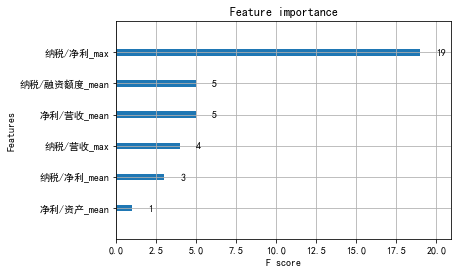

In [42]:
plot_importance(clf_xgb)

In [18]:
clf_rf = RandomForestClassifier(class_weight='balanced', n_estimators=100)
clf_dt = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)
clf_xgb = XGBClassifier(max_depth=3, gamma=1, reg_alpha=1, reg_lambda=1)
eclf = VotingClassifier(estimators=[('rf', clf_rf), ('dt', clf_dt), ('xgb', clf_xgb)], voting='soft', weights=[1, 1, 2])
accuracy_eclf = []
precision_eclf = []
recall_eclf = []
f1_eclf = []
traintime_eclf = 0
testtime_eclf = 0
for train, test in kf.split(X, y):
    st = time.time()
    eclf.fit(X.iloc[train], y.iloc[train])
    ed = time.time()
    traintime_eclf += (ed-st)
    y_pred = eclf.predict(X.iloc[test])
    edd = time.time()
    testtime_eclf += (edd-ed)
    accuracy_eclf.append(accuracy_score(y_pred, y.iloc[test]))
    precision_eclf.append(precision_score(y_pred, y.iloc[test]))
    recall_eclf.append(recall_score(y_pred, y.iloc[test]))
    f1_eclf.append(f1_score(y_pred, y.iloc[test]))
print("Voting")
print("Accuracy:", np.array(accuracy_eclf).mean())
print("Precision:", np.array(precision_eclf).mean())
print("Recall:", np.array(recall_eclf).mean())
print("F1-Score:", np.array(f1_eclf).mean())
print("Train time:", traintime_eclf / 4.0)
print("Test time:", testtime_eclf)

Voting
Accuracy: 0.999915836723243
Precision: 0.9998571173378247
Recall: 0.9999285459092533
F1-Score: 0.999892825244849
Train time: 28.77647703886032
Test time: 0.9434773921966553


In [8]:
import random

In [16]:
class GA:
    def __init__(self, popsize, crossp, mutatep, itersize):
        self.popsize = popsize
        self.crossp = crossp
        self.mutatep = mutatep
        self.itersize = itersize
        
        self.fitness = []
        self.clf_rf = RandomForestClassifier(class_weight='balanced', n_estimators=100)
        self.clf_dt = tree.DecisionTreeClassifier(max_depth=3, min_samples_leaf=4)
        self.clf_xgb = XGBClassifier(max_depth=3, gamma=1, reg_alpha=1, reg_lambda=1)
        
        self.result = []
        self.maxfitness = 0
        
        self.fitness_over_sum = []
        
        self.populations = []
        for i in range(self.popsize):
            self.populations.append([random.randint(0, 9) for x in range(9)])
            self.fitness.append(0)
            self.fitness_over_sum.append(0)
            
    def compute_fitness(self):
        for i, individual in enumerate(self.populations):
            weight1 = (individual[0]*100 + individual[1]*10 + individual[2]) / 1000
            weight2 = (individual[3]*100 + individual[4]*10 + individual[5]) / 1000
            weight3 = (individual[6]*100 + individual[7]*10 + individual[8]) / 1000
            
            eclf = VotingClassifier(estimators=[('rf', self.clf_rf), ('dt', self.clf_dt), ('xgb', self.clf_xgb)], voting='soft', 
                                    weights=[weight1, weight2, weight3])
            f1_eclf = []
            for train, test in kf.split(X, y):
                eclf.fit(X.iloc[train], y.iloc[train])
                y_pred = eclf.predict(X.iloc[test])
                f1_eclf.append(f1_score(y_pred, y.iloc[test]))
            self.fitness[i] = np.array(f1_eclf).mean()
    
    def compute_fitness_over_sum(self):
        sumfitness = sum(self.fitness)
        print(sumfitness / self.popsize)
        for i in range(self.popsize):
            self.fitness_over_sum[i] = self.fitness[i] / sumfitness
            
    def select(self):
        selp = random.random()
        cump = 0
        for i in range(self.popsize):
            cump += self.fitness_over_sum[i]
            if cump >= selp:
                return i
            
    def cross(self, individual1, individual2):
        rndp = random.random()
        if rndp <= self.crossp:
            pos = random.randint(0, 9)
            tmp = individual1[pos:]
            individual1[pos:] = individual2[pos:]
            individual2[pos:] = tmp
        return (individual1, individual2)
    
    def mutate(self, individual):
        rndp = random.random()
        if rndp <= self.mutatep:
            pos = random.randint(0, 8)
            num = random.randint(0, 9)
            while(num == individual[pos]):
                num = random.randint(0, 9)
            individual[pos] = num
        return individual
    
    def evolve(self):
        self.compute_fitness()
        self.compute_fitness_over_sum()
        tmp_populations = []
        for i in range(self.popsize // 2):
            index1 = self.select()
            index2 = self.select()
            while(index1 == index2):
                index1 = self.select()
                index2 = self.select()
            individual1 = self.populations[index1]
            individual2 = self.populations[index2]
            self.cross(individual1, individual2)
            self.mutate(individual1)
            self.mutate(individual2)
            tmp_populations.append(individual1)
            tmp_populations.append(individual2)
            
        for i in range(self.popsize):
            if(self.fitness[i] > self.maxfitness):
                self.maxfitness = self.fitness[i]
                self.result = self.populations[i]
            
        for i in range(self.popsize):
            self.populations[i] = tmp_populations[i]
            
    def run(self):
        for i in range(self.itersize):
            self.evolve()
        print('Result\nweight1: %.3f weight2: %.3f weight3: %.3f\nMax F1-Score: %.6f' % 
              ((self.result[0]*100 + self.result[1]*10 + self.result[2]) / 1000, 
              (self.result[3]*100 + self.result[4]*10 + self.result[5]) / 1000, 
              (self.result[6]*100 + self.result[7]*10 + self.result[8]) / 1000, 
              self.maxfitness)
             )

In [17]:
pa = GA(10, 0.8, 0.1, 5)

In [18]:
pa.run()

0.9998928252448491
0.9998928252448491
0.9998928252448491
0.9998928252448491
0.9998928252448491
Result
weight1: 0.762 weight2: 0.362 weight3: 0.707
Max F1-Score: 0.999893
